# Intro to Data Cleaning



This week, we'll be cleaning data.

Cleaning data is **labor intensive** and requires making *subjective* choices.  
We'll focus on, and assess you on, manipulating data correctly, making reasonable
choices, and documenting the choices you make carefully.

We'll focus on the programming tools that get used in cleaning data in class
this week:
- reshaping data
- handling missing or incorrect values
- renaming columns

In [1]:
import pandas as pd
import seaborn as sns

# sns.set_theme(pallete='colorblind')

## Tidy Data

Read in the three csv files described below and store them in a list of dataFrames

In [2]:
url_base = 'https://raw.githubusercontent.com/rhodyprog4ds/rhodyds/main/data/'

datasets = ['study_a.csv','study_b.csv','study_c.csv']

In [3]:
df_list = [pd.read_csv(url_base + current) for current in datasets]

In [4]:
type(df_list)

list

In [5]:
type(df_list[0])

pandas.core.frame.DataFrame

In [6]:
df_list[0]

,name,treatmenta,treatmentb
0,John Smith,-,2
1,Jane Doe,16,11
2,Mary Johnson,3,1


In [7]:
df_list[1]

,intervention,John Smith,Jane Doe,Mary Johnson
0,treatmenta,-,16,3
1,treatmentb,2,11,1


In [8]:
df_list[2]

,person,treatment,result
0,John Smith,a,-
1,Jane Doe,a,16
2,Mary Johnson,a,3
3,John Smith,b,2
4,Jane Doe,b,11
5,Mary Johnson,b,1


These three all show the same data, but let's say we have two goals:
- find the average  effect per person across treatments
- find the average effect per treatment across people

This works differently for these three versions.

In [9]:
df_list[0].mean()

/opt/hostedtoolcache/Python/3.7.14/x64/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


treatmenta   -54.333333
treatmentb     4.666667
dtype: float64

we get the average per treatment, but to get the average per person, we have to go across rows, which we can do here, but doesn't work as well with plotting

In [10]:
df_list[0].mean(axis=1)

/opt/hostedtoolcache/Python/3.7.14/x64/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0     2.0
1    11.0
2     1.0
dtype: float64

and this is not well labeled.


Let's try the next one.

In [11]:
df_list[1].mean()

/opt/hostedtoolcache/Python/3.7.14/x64/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


John Smith      -1.0
Jane Doe        13.5
Mary Johnson     2.0
dtype: float64

Now we get the average per person, but what about per treatment? again we have to go across rows instead.

In [12]:
df_list[1].mean(axis=1)

/opt/hostedtoolcache/Python/3.7.14/x64/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0    9.5
1    6.0
dtype: float64

For the third one, however, we can use groupby

In [13]:
df_list[2].groupby('person').mean()

/opt/hostedtoolcache/Python/3.7.14/x64/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,result
person,
Jane Doe,805.5
John Smith,-1.0
Mary Johnson,15.5


In [14]:
df_list[2].groupby('treatment').mean()

/opt/hostedtoolcache/Python/3.7.14/x64/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,result
treatment,
a,-54.333333
b,703.666667


The original [Tidy Data](https://www.jstatsoft.org/article/view/v059i10) paper is worth reading to build a deeper understanding of these ideas.  


## Tidying Data


Let's reshape the first one to match the tidy one. First, we
will save it to a DataFrame, this makes things easier to read
and enables us to use the built in help in jupyter, because it can't check types too many levels into a data structure.

In [15]:
treat_df = df_list[0]

Let's look at it again, so we can see

In [16]:
treat_df.head()

,name,treatmenta,treatmentb
0,John Smith,-,2
1,Jane Doe,16,11
2,Mary Johnson,3,1


In [17]:
df_list[0].columns

Index(['name', 'treatmenta', 'treatmentb'], dtype='object')

In [18]:
df_a = df_list[0]

In [19]:
df_a.melt(id_vars=['name'],value_vars=['treatmenta','treatmentb'],
          value_name='result',var_name='treatment')

,name,treatment,result
0,John Smith,treatmenta,-
1,Jane Doe,treatmenta,16
2,Mary Johnson,treatmenta,3
3,John Smith,treatmentb,2
4,Jane Doe,treatmentb,11
5,Mary Johnson,treatmentb,1


When we melt a dataset:
- the `id_vars` stay as columns
- the data from the `value_vars` columns become the values in the `value` column
- the column names from the `value_vars` become the values in the `variable` column
- we can rename the value and the variable columns.

Let's do it for our coffee data:

In [20]:
arabica_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv'

In [21]:
coffee_df = pd.read_csv(arabica_data_url)
scores_of_interest = ['Balance','Aroma','Body','Aftertaste']

In [22]:
coffee_tall = coffee_df.melt(id_vars=['Country.of.Origin','Color'],
                             value_vars=scores_of_interest
               ,var_name = 'Score')
coffee_tall.head()

,Country.of.Origin,Color,Score,value
0,Ethiopia,Green,Balance,8.42
1,Ethiopia,Green,Balance,8.42
2,Guatemala,NaN,Balance,8.42
3,Ethiopia,Green,Balance,8.25
4,Ethiopia,Green,Balance,8.33


Notice that the actual column names inside the `scores_of_interest` variable become the values in the variable column.

This one we can plot in more ways:

/opt/hostedtoolcache/Python/3.7.14/x64/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  


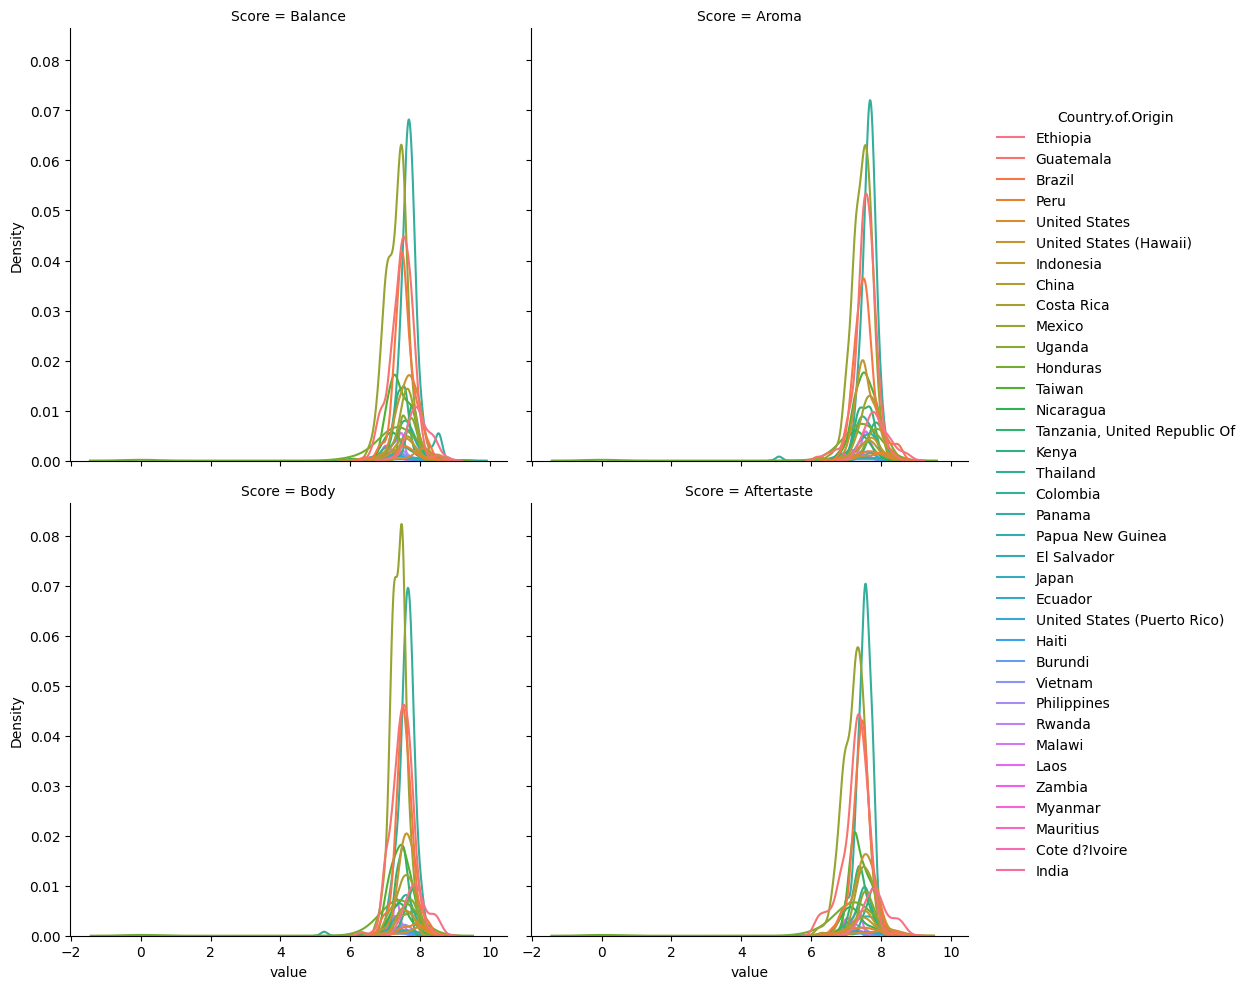

In [23]:
sns.displot(data=coffee_tall, x='value',hue='Country.of.Origin',
            col='Score',kind='kde',col_wrap=2)

## Filtering Data

In [24]:
high_prod = coffee_df[coffee_df['Number.of.Bags']>250]
high_prod.shape

(368, 44)

In [25]:
coffee_df.shape

(1311, 44)

We see that filters and reduces.  We can use any boolean expression in the square brackets.

In [26]:
top_balance = coffee_df[coffee_df['Balance']>coffee_df['Balance'].quantile(.75)]
top_balance.shape

(252, 44)

We can confirm that we got only the top 25% of balance scores:

In [27]:
top_balance.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.00000,252.000000,252.000000,252.000000,252.000000,190.000000,190.000000,190.000000
mean,273.535714,153.337302,7.808889,7.837659,7.734167,7.824881,7.780159,8.003095,9.885278,9.896667,9.885952,7.865714,84.52504,0.072579,0.361111,0.150794,2.801587,1343.138168,1424.547053,1383.842611
std,284.249040,126.498576,0.355319,0.318172,0.302481,0.320253,0.317712,0.213056,0.363303,0.470514,0.380433,0.383738,1.91563,0.051682,1.249923,0.692216,4.659771,480.927004,503.063351,484.286247
min,1.000000,0.000000,5.080000,7.170000,6.920000,7.080000,5.250000,7.830000,6.670000,5.330000,6.670000,5.170000,77.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,65.750000,12.750000,7.647500,7.670000,7.500000,7.670000,7.670000,7.830000,10.000000,10.000000,10.000000,7.670000,83.42000,0.000000,0.000000,0.000000,0.000000,1162.500000,1200.000000,1200.000000
50%,171.500000,165.500000,7.780000,7.830000,7.750000,7.830000,7.750000,7.920000,10.000000,10.000000,10.000000,7.830000,84.46000,0.100000,0.000000,0.000000,1.000000,1400.000000,1500.000000,1450.000000
75%,378.250000,275.000000,8.000000,8.000000,7.920000,8.000000,7.920000,8.080000,10.000000,10.000000,10.000000,8.080000,85.52000,0.110000,0.000000,0.000000,3.000000,1695.000000,1800.000000,1750.000000
max,1260.000000,360.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,9.250000,90.58000,0.210000,10.000000,6.000000,40.000000,2560.000000,2560.000000,2560.000000


We can also use the `isin` method to filter by comparing to an iterable type

In [28]:
total_per_country = coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].sum()
top_countries = total_per_country.sort_values(ascending=False)[:10].index
top_coffee_df = coffee_df[coffee_df['Country.of.Origin'].isin(top_countries)]

## Questions after class




### In the data we had about treatment a and treatment b.  Say there was another column that provided information about the age of the people.  Could we create another value variable to or would we put it in the value_vars list along with treatment a and treatmentb?
We can have multiple variables as the `id_vars` so that the dataset would have 4 columns instead of 3.


### Can we clean data within any row of the data as long as there is a column name for it?
Yes

### How to clean larger datasets

Everything we will learn will work in any context that you can load the dataset into RAM on the computer you are working on; or process it in batches.  


### with very large data sets, how can you tell id there are missing values or incorrect types present?

We use ways of checking the values, like the `info` method to check the whole column.



### Are there any prebuilt methods to identify and remove extreme outliers?

There may be, that is a good thing to look in the documentation for.  However, typically the definition of an outlier is best made within context, so the filtering strategy that we just used would be the way to remove them, after doign some EDA.


### Is there a specific metric to which a dataset must meet to consider it 'cleaned'?
It's "clean" when it will work for the analysis you want to do. This means clean enough for one analysis may not be enough for another goal.  Domain expertise is alwasy important.

### Are there any packages we may utilize that help us clean data more effectively?


### Things we will do later this week:

- adding more data to a DataFrame in jupyter notebook?
- replace values
- deal with NaN values in a dataset?

### Next week

- What is the difference between different types of merging data frames (inner, outer, left, right, etc)?